In [3]:
%matplotlib inline

from numpy import arange
from matplotlib import pyplot as plt
from scipy.stats import norm
import pandas as pd

plt.rcParams['figure.figsize'] = [16, 7]

## Load data:

For Each Attribute: (all numeric-valued)
   1. Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
   9. Class variable (0 or 1)

In [4]:

df = pd.read_csv("./FIFA-21 Complete.csv")
df.head()

player_id               name  nationality  position  overall  age  hits  \
0     158023       Lionel Messi    Argentina  ST|CF|RW       94   33   299   
1      20801  Cristiano Ronaldo     Portugal     ST|LW       93   35   276   
2     190871          Neymar Jr       Brazil    CAM|LW       92   28   186   
3     203376    Virgil van Dijk  Netherlands        CB       91   29   127   
4     200389          Jan Oblak     Slovenia        GK       91   27    47   

   potential                  team  
0         94         FC Barcelona   
1         93             Juventus   
2         92  Paris Saint-Germain   
3         92            Liverpool   
4         93      Atlético Madrid

In [5]:
df.dtypes

player_id       int64
name           object
nationality    object
position       object
overall         int64
age             int64
hits            int64
potential       int64
team           object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   player_id    17981 non-null  int64 
 1   name         17981 non-null  object
 2   nationality  17981 non-null  object
 3   position     17981 non-null  object
 4   overall      17981 non-null  int64 
 5   age          17981 non-null  int64 
 6   hits         17981 non-null  int64 
 7   potential    17981 non-null  int64 
 8   team         17981 non-null  object
dtypes: int64(5), object(4)
memory usage: 1.2+ MB


In [7]:
df.memory_usage() # in bytes

Index             128
player_id      143848
name           143848
nationality    143848
position       143848
overall        143848
age            143848
hits           143848
potential      143848
team           143848
dtype: int64

In [8]:
df.memory_usage().sum()

1294760

In [9]:
# To get statistics for all the columns at the same time
df.describe()

player_id       overall           age          hits     potential
count   17981.000000  17981.000000  17981.000000  17981.000000  17981.000000
mean   220912.660531     67.274345     26.311440      2.689450     71.738057
std     27738.072671      5.924392      4.556077     10.846286      5.961968
min        41.000000     56.000000     17.000000      0.000000     57.000000
25%    204881.000000     63.000000     23.000000      0.000000     67.000000
50%    226753.000000     67.000000     26.000000      0.000000     71.000000
75%    241587.000000     71.000000     30.000000      2.000000     76.000000
max    256469.000000     94.000000     43.000000    371.000000     95.000000

#### Statistical moments

1. Mean (1st moment)
2. Variance (2nd moment)
3. Skewness (3rd moment)
4. Kurtosis (4th moment)

In [10]:
# Applying mean() to the dataframe returns mean of each column (pandas series)
df.mean()

player_id    220912.660531
overall          67.274345
age              26.311440
hits              2.689450
potential        71.738057
dtype: float64

In [11]:
df['overall'].mean()

67.27434514209443

In [12]:
df['age'].mean() # returns the mean of 'preg_count' column

26.311439853178356

In [13]:
# variance
df.var()

player_id    7.694007e+08
overall      3.509842e+01
age          2.075784e+01
hits         1.176419e+02
potential    3.554506e+01
dtype: float64

#### Skewness

Skewness is the measure of the symmetry of a distribution compared to standard normal distribution

 - +ive - right skewed (mean is to the right of mode/median). Long tail in the +ive direction.
 - 0 - symmetric
 - -ive - left skewed (mean is to the left of mode/median). Long tail in the -ive direction.

In [14]:
# skewness
df.skew()

player_id    -1.710480
overall       0.519895
age           0.345407
hits         13.018062
potential     0.319897
dtype: float64

#### Kurtosis

Kurtosis is a measure of the flatness or peakedness of a distribution compared to the normal distribution.

 - +ive - Leptokurtosis (sharper/spikier peak compared to the normal dist.)
 - 0 - Mesokurtic (normal dist.)
 - -ive - Platykurtic (flatter peak compared to the normal dist.) eg. Uniform distribution

In [15]:
# skewness
df.kurtosis()

player_id      6.905274
overall        0.124736
age           -0.489534
hits         264.638908
potential     -0.083401
dtype: float64

#### min / max / median

In [16]:
# min of each column
df.min()

player_id                          41
name                   ?tefan Baiaram
nationality               Afghanistan
position                          CAM
overall                            56
age                                17
hits                                0
potential                          57
team           1. FC Heidenheim 1846 
dtype: object

In [17]:
# max of each column
df.max()

player_id              256469
name            Šime Vrsaljko
nationality            lbania
position             ST|RW|LW
overall                    94
age                        43
hits                      371
potential                  95
team           Östersunds FK 
dtype: object

In [18]:
# median of each column
df.median()

player_id    226753.0
overall          67.0
age              26.0
hits              0.0
potential        71.0
dtype: float64

#### Correlation

In [19]:
df.corr()

player_id   overall       age      hits  potential
player_id   1.000000 -0.392988 -0.726628 -0.043335   0.098938
overall    -0.392988  1.000000  0.341995  0.378900   0.638915
age        -0.726628  0.341995  1.000000 -0.073467  -0.374716
hits       -0.043335  0.378900 -0.073467  1.000000   0.429509
potential   0.098938  0.638915 -0.374716  0.429509   1.000000

In [20]:
import seaborn as sns

<AxesSubplot:>

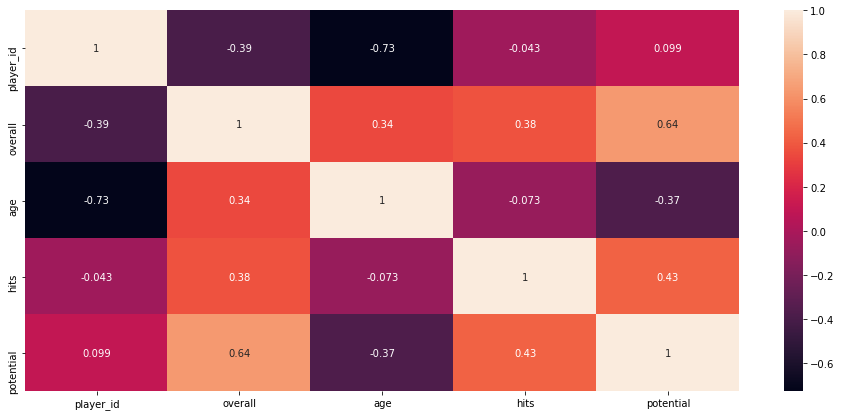

In [21]:
sns.heatmap(df.corr(), annot=True)

### Lineplot

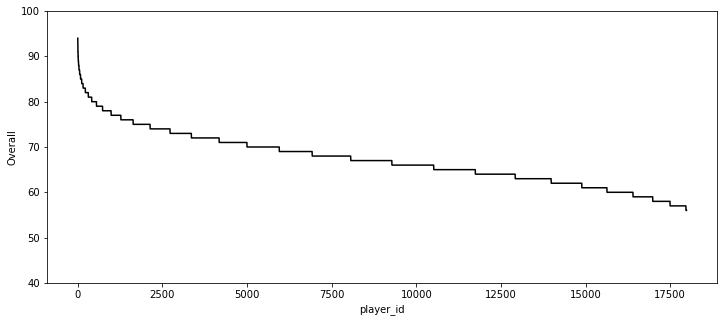

In [22]:
# Plotting with index along the x-axis
df['overall'].plot(figsize=(12, 5), color='black') # color and figsize changed

# plt.xlim(0, 780) # range for x-axis
plt.ylim(40, 100) # range for y-axis
plt.xlabel('player_id')
plt.ylabel('Overall'); # ";" prevents object info from displaying

### Scatterplot

<AxesSubplot:xlabel='age', ylabel='overall'>

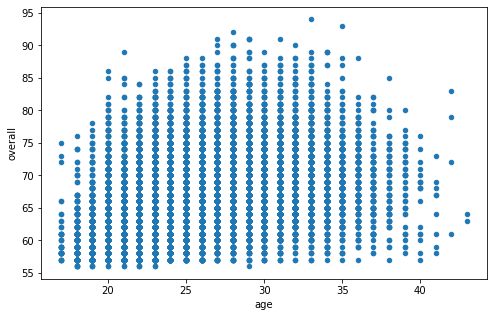

In [23]:
# plotting one variable against the other
df.plot.scatter('age', 'overall', figsize=(8, 5))

# The x and y labels are automatically taken from the column names

### Boxplot

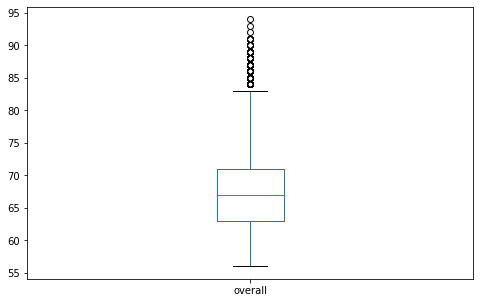

In [24]:
# Box plot of a column
df['overall'].plot.box(figsize=(8, 5));

<AxesSubplot:>

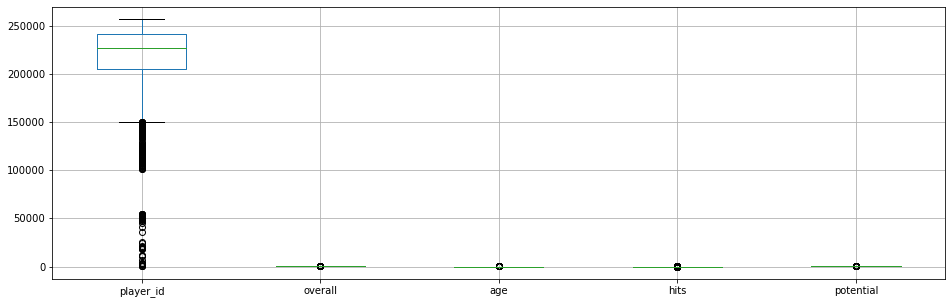

In [25]:
# Box plot of all the columns with numerical data
df.boxplot(figsize=(16, 5)) # or df.plot.box()

### Histogram

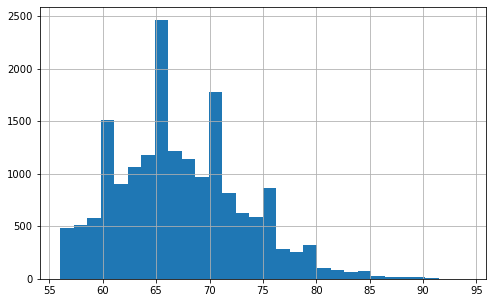

In [26]:
df['overall'].hist(bins=30, figsize=(8, 5)); # we can specify the number of bins

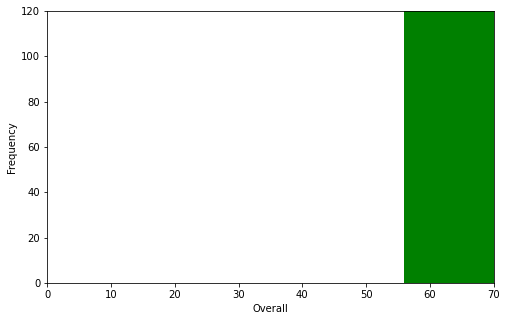

In [27]:
ax = df['overall'].hist(bins=30, grid=False, color='green', figsize=(8, 5)) # grid turned off and color changed

ax.set_xlabel('Overall')
ax.set_ylabel('Frequency')

ax.set_xlim(0, 70) # limiting display range to 0-70 for the x-axis
ax.set_ylim(0, 120); # limiting display range to 0-120 for the y-axis

### Barplot
The bar charts are used to visualize categorical data (nominal or ordinal values) and the height shows the value it represents

<AxesSubplot:xlabel='age'>

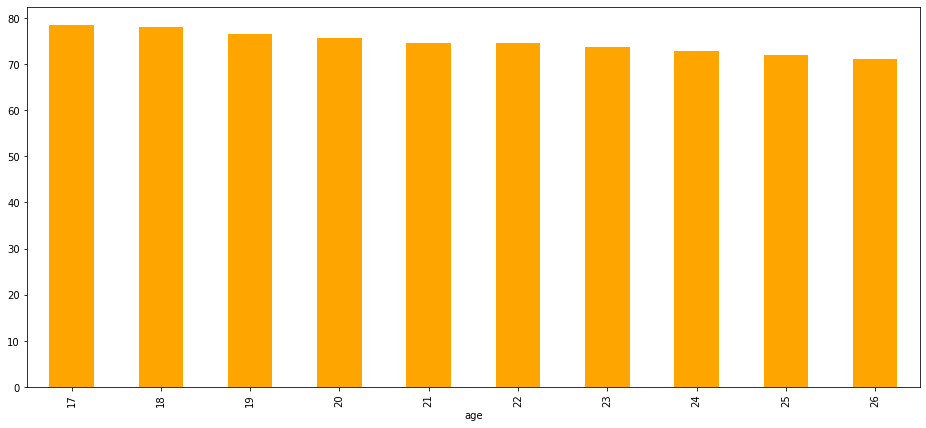

In [28]:
df_avg_BP = df.groupby('age')['potential'].mean()
df_avg_BP[:10].plot.bar(color='orange')

Text(0, 0.5, 'Value')

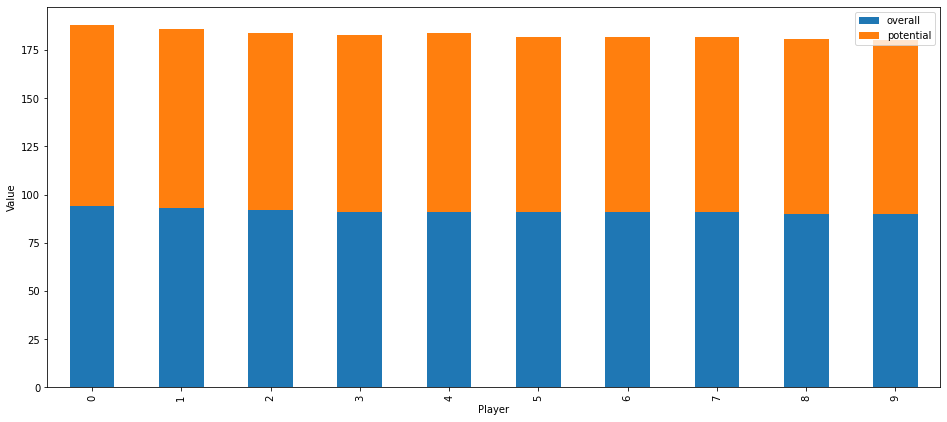

In [32]:
# To stack values from multiple columns
ax = df[['overall', 'potential']][:10].plot.bar(stacked=True)

ax.set_xlabel("Player")
ax.set_ylabel("Value")

### Multiple Plots

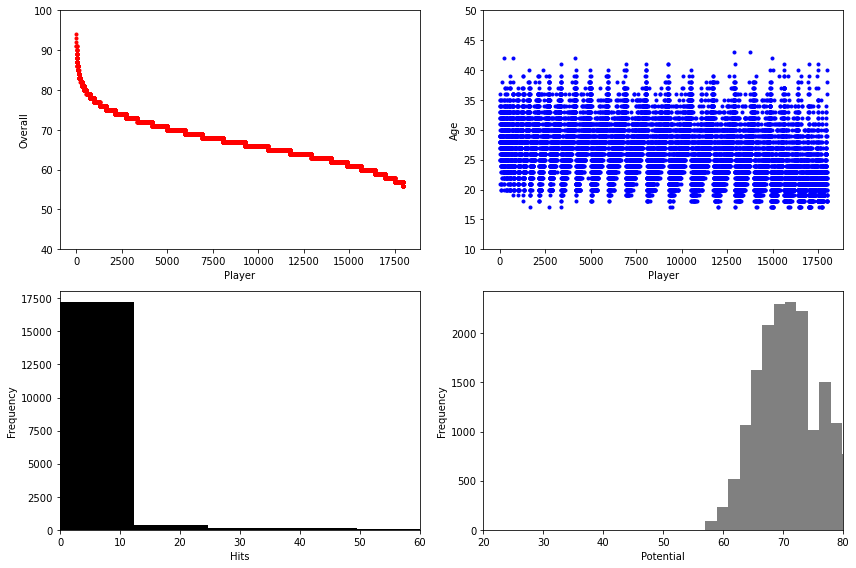

In [36]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
# or fig, (ax1, ax2, ax3, ax4) = plt.subplots(2, 2, figsize=(12, 8))

# axes is the axes object(s). It can be a single object or an array of objects. 
# In this case, it is an array of dimension 2-by-2

df['overall'].plot(ax = axes[0][0], style='.', color='red') # top left
df['age'].plot(ax = axes[0][1], style='.', color='blue') # top right

df['hits'].plot.hist(bins=30, ax = axes[1][0], color='black') # bottom left
df['potential'].plot.hist(bins=20, ax = axes[1][1], color='gray') # bottom right

axes[0][0].set_xlabel('Player')
axes[0][1].set_xlabel('Player')
axes[1][0].set_xlabel('Hits')
axes[1][1].set_xlabel('Potential')

axes[0][0].set_ylabel('Overall')
axes[0][1].set_ylabel('Age')

axes[0][0].set_ylim(40, 100)
axes[0][1].set_ylim(10, 50)

axes[1][0].set_xlim(0, 60)
axes[1][1].set_xlim(20, 80)

fig.tight_layout()